In [2]:
import pandas as pd
data = pd.read_csv("C:/Users/jacob/OneDrive/Desktop/winter_2026_courses/macs_30100/group_project/WVS_Cross-National_Wave_7_csv_v6_0.csv")

data.head()

C:\Users\jacob\AppData\Local\Temp\ipykernel_42184\3808377277.py:2: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/jacob/OneDrive/Desktop/winter_2026_courses/macs_30100/group_project/WVS_Cross-National_Wave_7_csv_v6_0.csv")


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [3]:
#import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import graphviz
import matplotlib.pyplot as plt

In [4]:
data.shape

(97220, 613)

In [5]:
# check for missing values
null_sum = data.isnull().sum()
null_sum

version             0
doi                 0
A_WAVE              0
A_YEAR              0
A_STUDY             0
                ...  
v2psprbrch      93302
v2psprlnks      93302
v2psplats       93302
v2xnp_client    93302
v2xps_party     93302
Length: 613, dtype: int64

In [6]:
# dropping columns with at 30% missing values
data.drop(columns=data.columns[null_sum > len(data) * 0.3], inplace=True)

In [7]:
# most relevant questions related to life-expectancy
relevant_questions = [
    "A_YEAR",
    "B_COUNTRY_ALPHA",
    # Health, Happiness, and Well-being
    "Q47", "Q48", "Q49","Q50","Q51","Q52","Q53","Q54","Q55","Q56",
    # Demographics (Sex, Age)
    "Q260", "Q262", 
    # Safety
    "Q131", "Q132", "Q133", "Q134", "Q135", "Q136", "Q137", "Q138",
    # Socioeconomic and Education
    "Q275R", "Q276R", "Q286", "Q287"
]

In [8]:
contextual_vars = [
    # Freedom House / Polity
    "fhregion",
    "polregfh",
    "freestfh",
    "prfhrat",
    "prfhscore",
    "clfhrat",
    "clfhscore",
    "democ",
    "autoc",
    "polity",
    "durable",
    "regtype",

    # Governance / Institutions
    "ruleoflaw",
    "corrupttransp",
    "electintegr",

    # Bertelsmann Transformation Index (BTI)
    "btiregion",
    "btistatus",
    "btidemstatus",
    "btistate",
    "btipolpart",
    "btiruleoflaw",
    "btistability",
    "btiintegration",
    "btimarket",
    "btigovindex",
    "btigoveperform",
    "btiregime",

    # World Bank – Geography & Economy
    "regionWB",
    "incomeWB",
    "landWB",
    "GDPpercap1",
    "GDPpercap2",
    "giniWB",
    "incrichest10p",

    # Population & Demographics
    "popWB1990",
    "popWB2000",
    "popWB2019",
    "lifeexpect",
    "popgrowth",
    "urbanpop",
    "laborforce",
    "deathrate",

    # Labor, Infrastructure, Environment
    "unemployfem",
    "unemploymale",
    "unemploytotal",
    "accessclfuel",
    "accesselectr",
    "renewelectr",
    "co2emis",
    "co2percap",

    # Economy & Public Spending
    "easeofbusiness",
    "militaryexp",
    "Trade",
    "healthexp",
    "educationexp",

    # Education, Gender, Human Development
    "medageun",
    "meanschooling",
    "educationHDI",
    "compulseduc",
    "GII",
    "DGI",
    "womenparl",
    "hdi",
    "incomeindexHDI",
    "humanineqiality",
    "lifeexpectHDI",
    # Crime, migration, technology
    "homiciderate",
    "Refugeesorigin",
    "internetusers",
    "mobphone",
    "migrationrate",

    # Education & gender (macro-level)
    "schoolgpi",
    "femchoutsch",
    "choutsch",

    # V-Dem democracy indices (core regime measures)
    "v2x_polyarchy",
    "v2x_libdem",
    "v2x_partipdem",
    "v2x_delibdem",
    "v2x_egaldem",

    # V-Dem freedoms & rule of law
    "v2x_freexp_altinf",
    "v2x_frassoc_thick",
    "v2xel_frefair",
    "v2xcl_rol",
    "v2x_rule",

    # V-Dem corruption & accountability
    "v2excrptps",
    "v2exthftps",
    "v2juaccnt",
    "v2x_corr",

    # V-Dem civil liberties & justice
    "v2cltrnslw",
    "v2clacjust",
    "v2clacfree",
    "v2clrelig",
    "v2clgencl",
    "v2xcl_acjst",

    # V-Dem social & political equality
    "v2clsocgrp",
    "v2csrlgrep",
    "v2x_cspart",
    "v2xeg_eqdr",
    "v2x_gender",
    "v2x_gencl",
    "v2x_genpp",

    # V-Dem media & executive power
    "v2mecenefm",
    "v2mecenefi",
    "v2mebias",

    # V-Dem political empowerment
    "v2pepwrses",
    "v2pepwrgen",
    "v2peedueq",
    "v2pehealth",
    "v2peapsecon",
    "v2peasjsoecon",
    "v2peasjgen",
    "v2peasbgen",

    # Civil society & associations
    "v2cafres",
    "v2cafexch"
]


In [9]:
contextual_vars = list(set(contextual_vars))

In [10]:
# combine all relevant features
all_vars = relevant_questions + contextual_vars

In [11]:
# remove all irrelevant features
data = data.loc[:, data.columns.intersection(all_vars)]

In [12]:
list(data.columns)

['A_YEAR',
 'B_COUNTRY_ALPHA',
 'Q47',
 'Q48',
 'Q49',
 'Q50',
 'Q51',
 'Q52',
 'Q53',
 'Q54',
 'Q55',
 'Q56',
 'Q131',
 'Q132',
 'Q133',
 'Q134',
 'Q135',
 'Q136',
 'Q137',
 'Q138',
 'Q260',
 'Q262',
 'Q275R',
 'Q276R',
 'Q286',
 'Q287',
 'fhregion',
 'polregfh',
 'freestfh',
 'prfhrat',
 'prfhscore',
 'clfhrat',
 'clfhscore',
 'democ',
 'autoc',
 'polity',
 'durable',
 'regtype',
 'ruleoflaw',
 'corrupttransp',
 'electintegr',
 'btiregion',
 'btistatus',
 'btidemstatus',
 'btistate',
 'btipolpart',
 'btiruleoflaw',
 'btistability',
 'btiintegration',
 'btimarket',
 'btigovindex',
 'btigoveperform',
 'btiregime',
 'regionWB',
 'incomeWB',
 'landWB',
 'GDPpercap1',
 'GDPpercap2',
 'giniWB',
 'incrichest10p',
 'popWB1990',
 'popWB2000',
 'popWB2019',
 'lifeexpect',
 'popgrowth',
 'urbanpop',
 'laborforce',
 'deathrate',
 'unemployfem',
 'unemploymale',
 'unemploytotal',
 'accessclfuel',
 'accesselectr',
 'renewelectr',
 'co2emis',
 'co2percap',
 'easeofbusiness',
 'militaryexp',
 'Trade

In [13]:
# renaming columns for clarity
data = data.rename(columns= {
    'A_YEAR': 'Year',
    'B_COUNTRY_ALPHA': 'Country',
    'polregfh': 'FH_Pol_Regime',
    'fhregion': 'FH_Region',
    'freestfh': 'FH_Free_Status',
    'prfhrat': 'FH_Pol_Rights_rat',
    'prfhscore': 'FH_Pol_Rights_pts',
    'clfhrat': 'FH_CL_rat',
    'clfhscore': 'FH_CL_pts',
    'democ': 'Democracy_sc',
    'autoc': 'Autocracy_sc',
    'durable': 'Regime_Durability',
    'electintegr': 'Electoral_Integrity',
    'medageun': 'Median_Age',
    'compulseduc': 'Years_Comp_Edu',
    'femchoutsch': 'F_OutSchool',
    'choutsch': 'Ch_OutSchool',
    'v2cltrnslw': 'TransLaws',
    'v2clacjust': 'ClassEqual',
    'v2clsocgrp': 'SocGroupEqual',
    'v2clacfree': 'AcademicFree',
    'v2clrelig': 'ReligFree',
    'v2csrlgrep': 'ReligRep',
    'v2mecenefm': 'GovCensor',
    'v2mebias': 'MediaBias',
    'v2pepwrses': 'PowerDis_Soe',
    'v2pepwrgen': 'PowerDis_Gen',
    'v2peedueq': 'Edu_Eq',
    'v2peasjsoecon': 'Ac_StateJobs',
    'v2peapsecon': 'Ac_PubServ',
    'v2clgencl': 'Gen_Eq_CL',
    'v2peasjgen': 'Gen_Ac_StateJobs',
    'v2peasbgen': 'Gen_Ac_StateBus',
    'v2cafres': 'Free_Research',
    'v2cafexch': 'Free_Aca_Exc',
    'v2x_corr': 'Pol_Corrupt',
    'v2x_gender': 'F_PolEmpower',
    'v2x_gencl': 'F_CL',
    'v2x_genpp': 'F_PolPart',
    'v2x_rule': 'RoL',
    'v2xcl_acjst': 'AtJ',
    'Q47': "Health_Status",
    'Q48': 'Choice_Freedom',
    'Q49': 'Life_Satisfaction',
    'Q50': 'Fin_Satisfaction',
    'Q51': 'Food_Security',
    'Q52': 'Crime_Security',
    'Q53': 'Med_Security',
    'Q54': 'Cash_Security',
    'Q55': 'Safe_Security',
    'Q56': 'Stand_Living',
    'Q131': 'Neigh_Security',
    'Q132': 'Freq_Robb',
    'Q133': 'Freq_Alc',
    'Q134': 'Freq_Police',
    'Q135': 'Freq_Racism',
    'Q136': 'Freq_Drug',
    'Q137': 'Freq_Violence',
    'Q138': 'Freq_SexHarass',
    'Q260': 'Sex',
    'Q262': 'Age',
    'Q275R': 'Highest_Edu_Lvl',
    'Q276R': 'Spouse_Highest_Edu_Lvl',
    'Q286': 'Family_Savings',
    'Q287': 'Social_Class',
    'v2x_freexp_altinf': 'Free_Expression_Alt',
    'v2x_frassoc_thick': 'Free_Association_Thick',
    'v2xel_frefair': 'Free_Fair_Elec',
    'v2xcl_rol': 'Equal_Before_Law',
    'v2x_cspart': 'Civil_Society_Part',
    'v2xeg_eqdr': 'Equal_Dist_Resourses',
    'v2excrptps': 'Public_Sec_Corr',
    'v2exthftps': 'Public_Sec_Theft',
    'v2juaccnt': 'Judicial_Accountability',
    'v2mecenefi': 'Internet_Censorship',
    'v2pehealth': 'Health_Equality'
})


In [14]:
list(data.columns)

['Year',
 'Country',
 'Health_Status',
 'Choice_Freedom',
 'Life_Satisfaction',
 'Fin_Satisfaction',
 'Food_Security',
 'Crime_Security',
 'Med_Security',
 'Cash_Security',
 'Safe_Security',
 'Stand_Living',
 'Neigh_Security',
 'Freq_Robb',
 'Freq_Alc',
 'Freq_Police',
 'Freq_Racism',
 'Freq_Drug',
 'Freq_Violence',
 'Freq_SexHarass',
 'Sex',
 'Age',
 'Highest_Edu_Lvl',
 'Spouse_Highest_Edu_Lvl',
 'Family_Savings',
 'Social_Class',
 'FH_Region',
 'FH_Pol_Regime',
 'FH_Free_Status',
 'FH_Pol_Rights_rat',
 'FH_Pol_Rights_pts',
 'FH_CL_rat',
 'FH_CL_pts',
 'Democracy_sc',
 'Autocracy_sc',
 'polity',
 'Regime_Durability',
 'regtype',
 'ruleoflaw',
 'corrupttransp',
 'Electoral_Integrity',
 'btiregion',
 'btistatus',
 'btidemstatus',
 'btistate',
 'btipolpart',
 'btiruleoflaw',
 'btistability',
 'btiintegration',
 'btimarket',
 'btigovindex',
 'btigoveperform',
 'btiregime',
 'regionWB',
 'incomeWB',
 'landWB',
 'GDPpercap1',
 'GDPpercap2',
 'giniWB',
 'incrichest10p',
 'popWB1990',
 'popWB

In [15]:
data.shape

(97220, 140)

In [16]:
# remove any duplicate rows
data = data.drop_duplicates()
data.shape

(97048, 140)

In [17]:
data.shape

(97048, 140)

In [18]:
# split features and target variable
X = data.drop(columns=["lifeexpectHDI"])
y = data["lifeexpectHDI"]

In [19]:
# select numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop("Year")

In [20]:
# select categorical columns
cat_cols = ["Year", "Country"]
data[cat_cols] = data[cat_cols].astype("category")

In [21]:
# check types
data.dtypes.astype(str).value_counts()

float64     114
int64        24
category      2
Name: count, dtype: int64

#### No categorical procssing is needed because

# Numerical Data Processing

In [22]:
data[num_cols].head()

,Health_Status,Choice_Freedom,Life_Satisfaction,Fin_Satisfaction,Food_Security,Crime_Security,Med_Security,Cash_Security,Safe_Security,Stand_Living,...,Gen_Ac_StateJobs,Gen_Ac_StateBus,Free_Research,Free_Aca_Exc,Pol_Corrupt,F_PolEmpower,F_CL,F_PolPart,RoL,AtJ
0,3,10,10,5,4,4,4,4,4,1,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,1,9,9,9,4,4,4,4,4,1,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,1,9,9,8,4,4,4,3,4,2,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,2,9,8,6,4,4,4,4,4,3,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,2,8,7,7,4,4,4,4,4,-2,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


**Method 1: Change missing data to mean**

In [23]:
data_wmean = data.copy()
missing_codes = [-999, -9999] + list(range(-5,0)) # [-999, -9999, -5, -4, -3, -2, -1] are all encoded as "missing"
for col in num_cols:
    non_negative_values = data_wmean.loc[~data_wmean[col].isin(missing_codes), col]
    mean_value = non_negative_values.mean()

    data_wmean.loc[data_wmean[col].isin(missing_codes), col] = mean_value

data_wmean.head()

C:\Users\jacob\AppData\Local\Temp\ipykernel_42184\321449530.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.1900196301270793' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_wmean.loc[data_wmean[col].isin(missing_codes), col] = mean_value
C:\Users\jacob\AppData\Local\Temp\ipykernel_42184\321449530.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.213417932182234' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_wmean.loc[data_wmean[col].isin(missing_codes), col] = mean_value
C:\Users\jacob\AppData\Local\Temp\ipykernel_42184\321449530.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.062233271182929' has dtype incompatible with int64, plea

,Year,Country,Health_Status,Choice_Freedom,Life_Satisfaction,Fin_Satisfaction,Food_Security,Crime_Security,Med_Security,Cash_Security,...,Gen_Ac_StateJobs,Gen_Ac_StateBus,Free_Research,Free_Aca_Exc,Pol_Corrupt,F_PolEmpower,F_CL,F_PolPart,RoL,AtJ
0,2018,AND,3.0,10.0,10.0,5.0,4.0,4.0,4.0,4.0,...,1.514945,1.086808,0.648832,0.762409,0.462596,0.770502,0.697691,0.89041,0.605466,0.654977
1,2018,AND,1.0,9.0,9.0,9.0,4.0,4.0,4.0,4.0,...,1.514945,1.086808,0.648832,0.762409,0.462596,0.770502,0.697691,0.89041,0.605466,0.654977
2,2018,AND,1.0,9.0,9.0,8.0,4.0,4.0,4.0,3.0,...,1.514945,1.086808,0.648832,0.762409,0.462596,0.770502,0.697691,0.89041,0.605466,0.654977
3,2018,AND,2.0,9.0,8.0,6.0,4.0,4.0,4.0,4.0,...,1.514945,1.086808,0.648832,0.762409,0.462596,0.770502,0.697691,0.89041,0.605466,0.654977
4,2018,AND,2.0,8.0,7.0,7.0,4.0,4.0,4.0,4.0,...,1.514945,1.086808,0.648832,0.762409,0.462596,0.770502,0.697691,0.89041,0.605466,0.654977


In [24]:
# remove any duplicate rows
data_wmean = data_wmean.drop_duplicates()
data_wmean.shape

(97043, 140)

In [25]:
# review distribution of numerical features
data_wmean[num_cols].describe()

,Health_Status,Choice_Freedom,Life_Satisfaction,Fin_Satisfaction,Food_Security,Crime_Security,Med_Security,Cash_Security,Safe_Security,Stand_Living,...,Gen_Ac_StateJobs,Gen_Ac_StateBus,Free_Research,Free_Aca_Exc,Pol_Corrupt,F_PolEmpower,F_CL,F_PolPart,RoL,AtJ
count,97043.000000,97043.000000,97043.000000,97043.000000,97043.000000,97043.000000,97043.000000,97043.000000,97043.000000,97043.000000,...,96596.000000,96596.000000,95598.000000,95598.000000,96596.00000,96596.000000,96596.000000,96596.000000,96596.000000,96596.000000
mean,2.190034,7.213402,7.062204,6.208825,3.495748,3.451497,3.355622,3.182463,3.724761,1.725860,...,1.514924,1.086756,0.648804,0.762392,0.46261,0.770498,0.697684,0.890406,0.605455,0.654967
std,0.874363,2.248430,2.232682,2.419278,0.847175,0.867301,0.926040,1.005587,0.690241,0.858122,...,0.972839,1.030045,1.224767,1.222800,0.29288,0.143605,0.199581,0.131595,0.292662,0.247703
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.647000,-2.052000,-2.417000,-1.682000,0.01800,0.425000,0.261000,0.365000,0.014000,0.159000
25%,2.000000,6.000000,6.000000,5.000000,3.000000,3.000000,3.000000,2.000000,4.000000,1.000000,...,1.016000,0.696000,-0.273000,0.004000,0.11900,0.677000,0.517000,0.834000,0.360000,0.466000
50%,2.000000,7.213418,7.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,...,1.514945,1.086808,0.648832,0.762409,0.47500,0.792000,0.733000,0.949000,0.645000,0.700000
75%,3.000000,9.000000,9.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,1.977000,1.742000,1.729000,1.696000,0.73300,0.884000,0.883000,0.990000,0.890000,0.896000
max,5.000000,10.000000,10.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,3.341000,2.926000,2.905000,3.012000,0.90700,0.953000,0.954000,1.000000,0.988000,0.983000


In [26]:
# remove outliers
outliers_index = set()
for col in data_wmean[num_cols].columns:
    Q1 = data_wmean[col].quantile(0.25)
    Q3 = data_wmean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_thresh = Q1 - 3.0*IQR
    upper_thresh = Q3 + 3.0*IQR
    outliers = data_wmean.index[~data_wmean[col].between(lower_thresh, upper_thresh)]
    outliers_index.update(outliers)

data_wmean = data_wmean.drop(index=outliers_index)

data_wmean.shape # 97043 to 45263 rows


(22945, 140)

In [27]:
# choosing 5 random features for visualization purposes
features = [
    "incomeindexHDI",
    "ClassEqual",
    "Equal_Before_Law",
    "homiciderate",
    "unemploytotal"
]

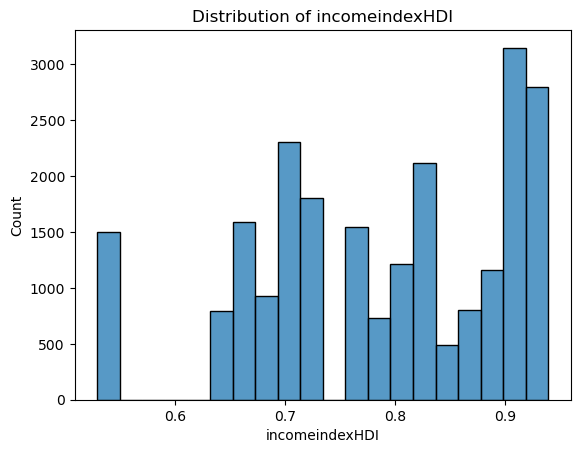

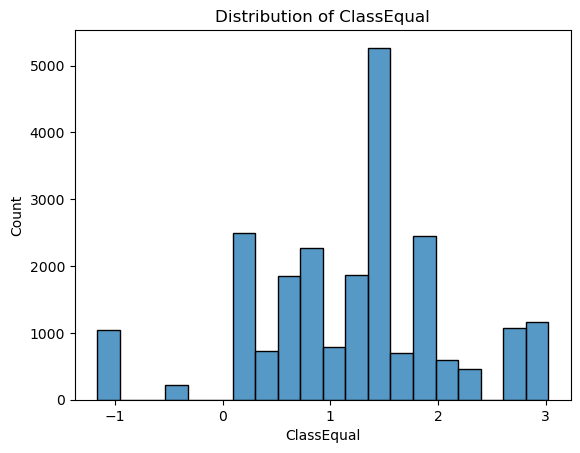

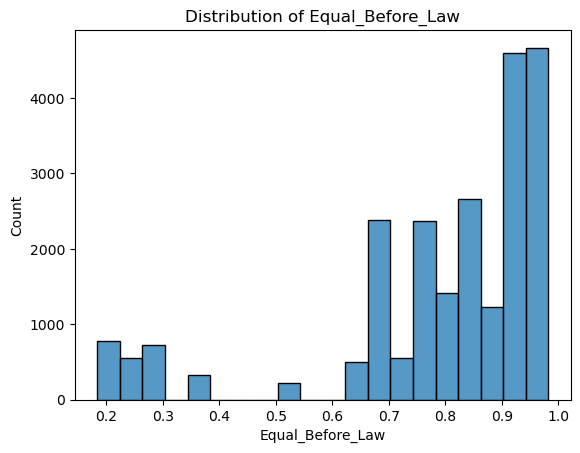

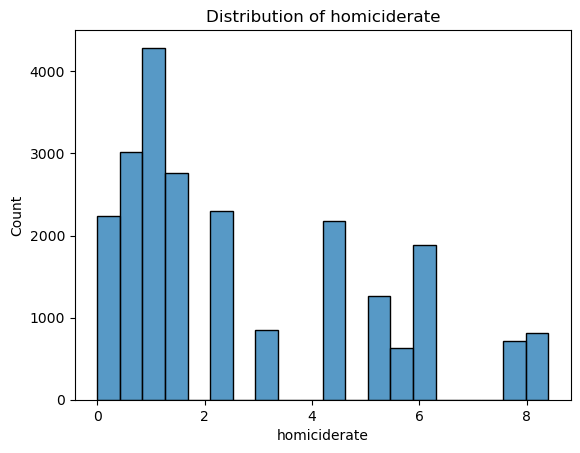

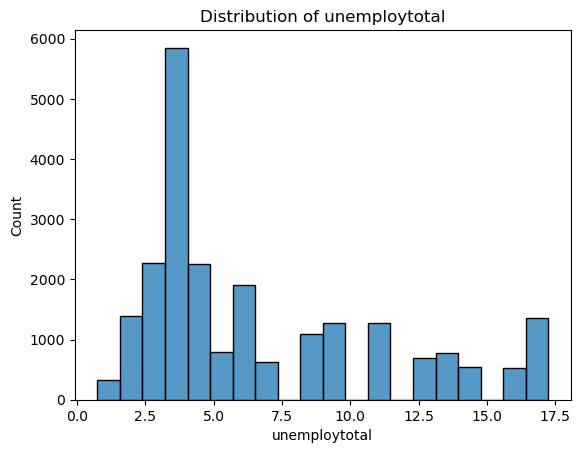

In [28]:
# visualization of selected features
for feature in features:
    sns.histplot(data_wmean[feature], bins = 20)
    plt.title(f'Distribution of {feature}')
    plt.show()

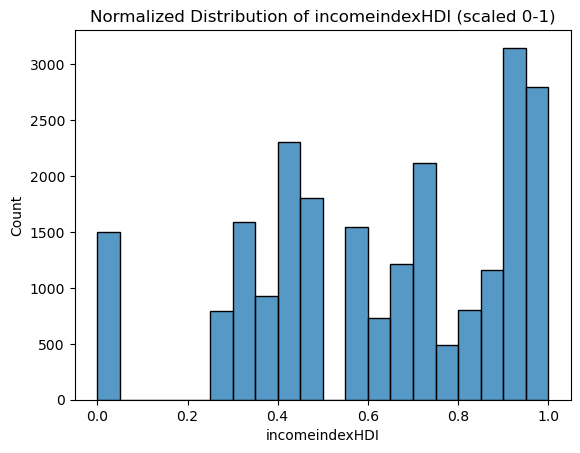

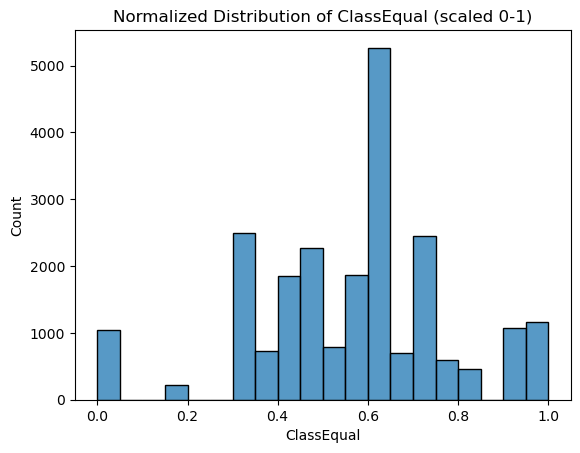

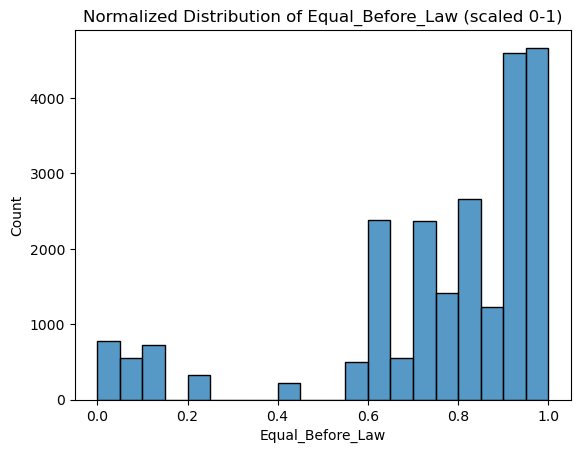

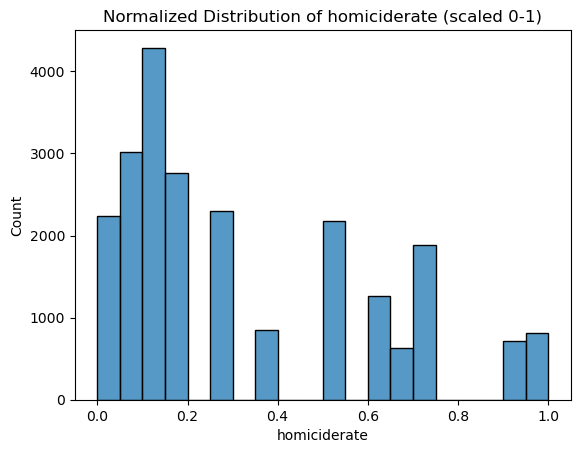

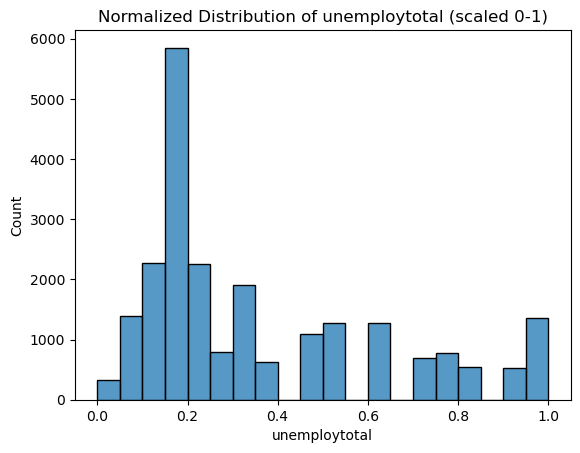

In [29]:
# normalized distributions

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
for feature in features:
    # Scale the feature
    scaled_values = scaler.fit_transform(data_wmean[feature].values.reshape(-1, 1))
    data_wmean[feature] = scaled_values
    
    # Plot the histogram
    sns.histplot(data_wmean[feature], bins=20)
    plt.title(f'Normalized Distribution of {feature} (scaled 0-1)')
    plt.show()

**Method 1: Change missing data to median**

In [30]:
data_wmedian = data.copy()
missing_codes = [-999, -9999] + list(range(-5,0)) # [-999, -9999, -5, -4, -3, -2, -1] are all encoded as "missing"
for col in num_cols:
    non_negative_values = data_wmedian.loc[~data_wmedian[col].isin(missing_codes), col]
    median_value = non_negative_values.median()

    data_wmedian.loc[data_wmedian[col].isin(missing_codes), col] = median_value

data_wmedian.head()

,Year,Country,Health_Status,Choice_Freedom,Life_Satisfaction,Fin_Satisfaction,Food_Security,Crime_Security,Med_Security,Cash_Security,...,Gen_Ac_StateJobs,Gen_Ac_StateBus,Free_Research,Free_Aca_Exc,Pol_Corrupt,F_PolEmpower,F_CL,F_PolPart,RoL,AtJ
0,2018,AND,3,10,10,5,4,4,4,4,...,1.577,1.216,0.864,0.901,0.487,0.815,0.754,0.95,0.645,0.7
1,2018,AND,1,9,9,9,4,4,4,4,...,1.577,1.216,0.864,0.901,0.487,0.815,0.754,0.95,0.645,0.7
2,2018,AND,1,9,9,8,4,4,4,3,...,1.577,1.216,0.864,0.901,0.487,0.815,0.754,0.95,0.645,0.7
3,2018,AND,2,9,8,6,4,4,4,4,...,1.577,1.216,0.864,0.901,0.487,0.815,0.754,0.95,0.645,0.7
4,2018,AND,2,8,7,7,4,4,4,4,...,1.577,1.216,0.864,0.901,0.487,0.815,0.754,0.95,0.645,0.7


In [31]:
# remove any duplicate rows
data_wmedian = data_wmean.drop_duplicates()
data_wmedian.shape

(22945, 140)

In [32]:
# review distribution of numerical features
data_wmedian[num_cols].describe()

,Health_Status,Choice_Freedom,Life_Satisfaction,Fin_Satisfaction,Food_Security,Crime_Security,Med_Security,Cash_Security,Safe_Security,Stand_Living,...,Gen_Ac_StateJobs,Gen_Ac_StateBus,Free_Research,Free_Aca_Exc,Pol_Corrupt,F_PolEmpower,F_CL,F_PolPart,RoL,AtJ
count,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.00000,22945.0,22945.000000,...,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000
mean,2.181306,7.237204,7.203170,6.362103,3.698441,3.587445,3.567640,3.46607,4.0,1.775970,...,1.649408,1.221479,1.245809,1.344184,0.382510,0.816988,0.783474,0.915571,0.711905,0.763320
std,0.851962,2.103210,2.033532,2.279566,0.668621,0.780518,0.787173,0.85768,0.0,0.876448,...,0.794166,0.885809,1.191906,1.117683,0.285589,0.130873,0.166994,0.105147,0.253745,0.191951
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.0,1.000000,...,-1.126000,-1.479000,-2.417000,-1.682000,0.022000,0.425000,0.307000,0.633000,0.113000,0.189000
25%,2.000000,6.000000,6.000000,5.000000,4.000000,3.000000,3.000000,3.00000,4.0,1.000000,...,1.294000,0.988000,0.648832,0.802000,0.067000,0.772000,0.697691,0.860000,0.572000,0.654977
50%,2.000000,7.000000,7.000000,7.000000,4.000000,4.000000,4.000000,4.00000,4.0,1.000000,...,1.514945,1.086808,1.520000,1.592000,0.430000,0.853000,0.816000,0.957000,0.730000,0.802000
75%,3.000000,9.000000,9.000000,8.000000,4.000000,4.000000,4.000000,4.00000,4.0,3.000000,...,2.077000,1.876000,1.995000,2.107000,0.621000,0.902000,0.912000,0.994000,0.958000,0.928000
max,5.000000,10.000000,10.000000,10.000000,4.000000,4.000000,4.000000,4.00000,4.0,3.000000,...,3.341000,2.926000,2.905000,3.012000,0.907000,0.953000,0.954000,1.000000,0.988000,0.983000


In [33]:
# remove outliers
outliers_index = set()
for col in data_wmedian[num_cols].columns:
    Q1 = data_wmedian[col].quantile(0.25)
    Q3 = data_wmedian[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_thresh = Q1 - 3.0*IQR
    upper_thresh = Q3 + 3.0*IQR
    outliers = data_wmedian.index[~data_wmedian[col].between(lower_thresh, upper_thresh)]
    outliers_index.update(outliers)

data_wmedian = data_wmedian.drop(index=outliers_index)

data_wmedian.shape # 97043 to 45263 rows

(7947, 140)

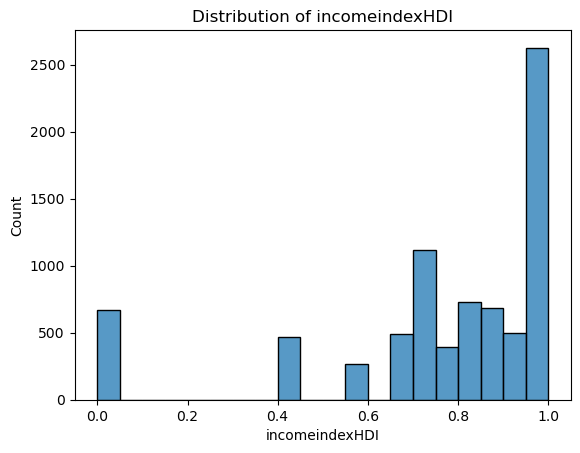

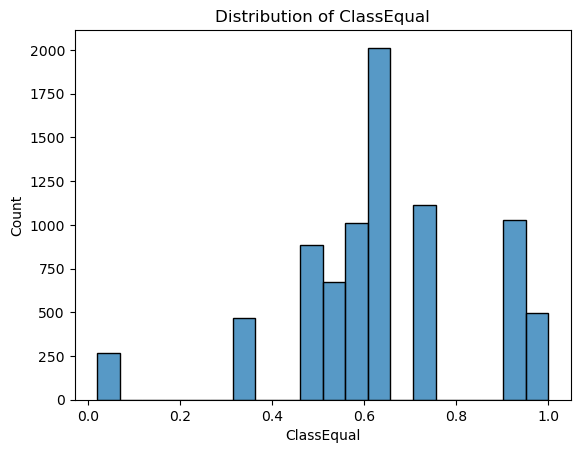

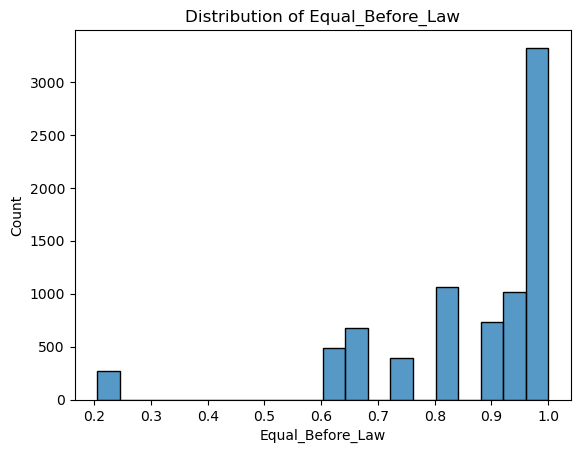

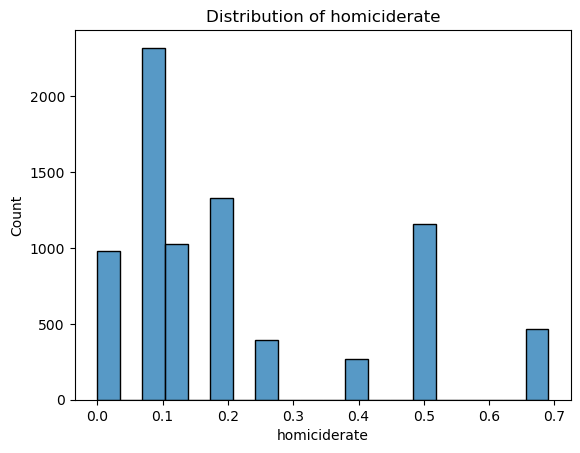

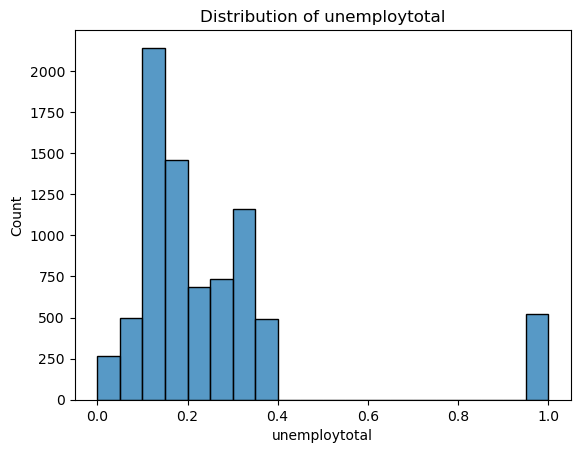

In [34]:
# visualization of selected features
for feature in features:
    sns.histplot(data_wmedian[feature], bins = 20)
    plt.title(f'Distribution of {feature}')
    plt.show()

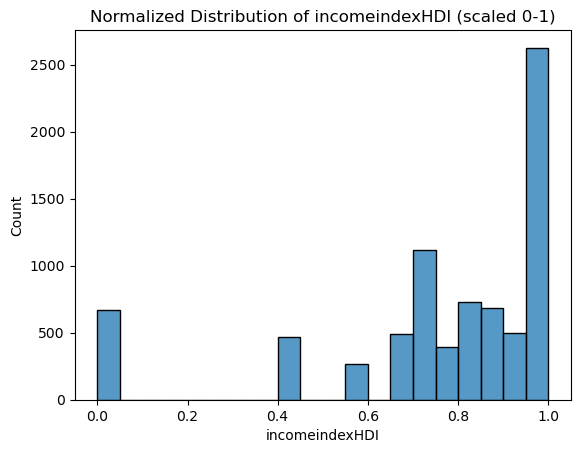

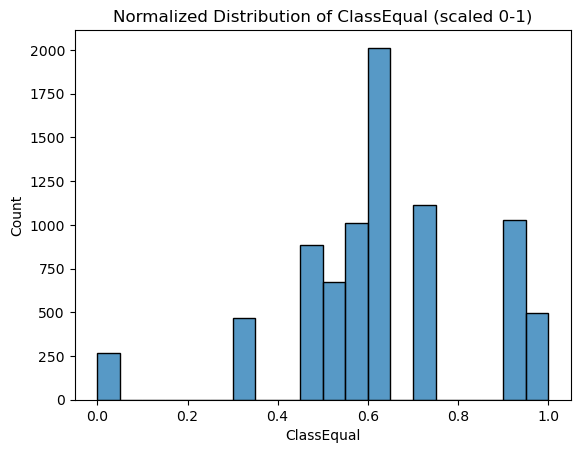

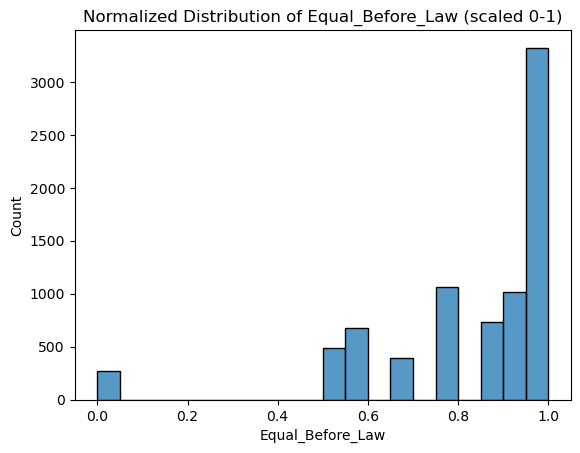

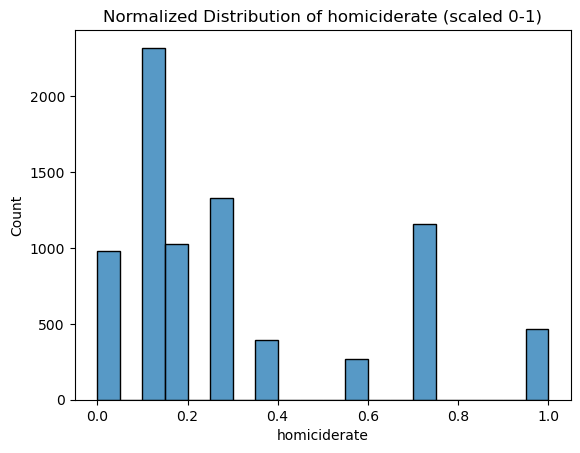

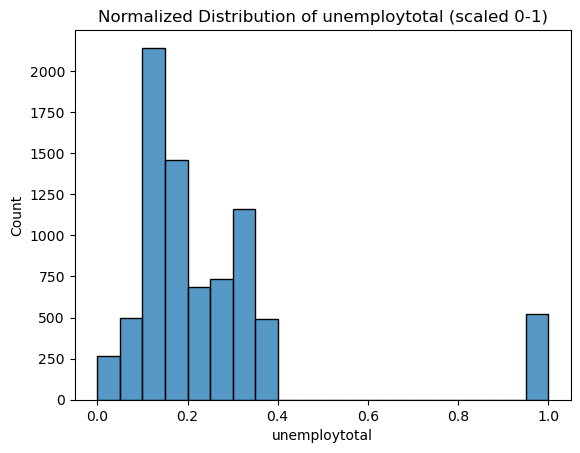

In [35]:
# Normalized visualization of selected features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
for feature in features:
    # Scale the feature
    scaled_values = scaler.fit_transform(data_wmedian[feature].values.reshape(-1, 1))
    data_wmedian[feature] = scaled_values

    # Plot the histogram
    sns.histplot(data_wmedian[feature], bins=20)
    plt.title(f'Normalized Distribution of {feature} (scaled 0-1)')
    plt.show()

### Part 2 Decision Trees

#### Start exploring the data with a classification decision tree with the target feature as gender.

In [36]:
#Create a copy of the dataset with only numerical features to split on.
X_data = data_wmedian[num_cols].copy()
feature_names = X_data.columns.to_list()
X_data = X_data.drop(columns="Sex")
X_data.shape

(7947, 137)

In [37]:
# Create the target variable
y_data = data_wmedian[['Sex']]
y_data.shape

(7947, 1)

In [38]:
# Split the data into training and testing
X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)

In [39]:
# Check the data distributon of the target variable in training and testing set
print("training:", y_train.value_counts(),'\n')
print("testing:", y_test.value_counts())

training: Sex
2.0    2987
1.0    2575
Name: count, dtype: int64 

testing: Sex     
2.000000    1239
1.000000    1145
1.526518       1
Name: count, dtype: int64


In [40]:
# Remove the outlier because sex is a binary variable
y_test = y_test[y_test.isin([1, 2])]

# Drop NaNs from y_test
y_test = y_test.dropna()

#Align X_test to y_test
X_test = X_test.loc[y_test.index]

In [41]:
# Check the data distributon again
print("training:", y_train.value_counts(),'\n')
print("testing:", y_test.value_counts())

training: Sex
2.0    2987
1.0    2575
Name: count, dtype: int64 

testing: Sex
2.0    1239
1.0    1145
Name: count, dtype: int64


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_wvs = DecisionTreeClassifier(random_state=42)
dt_wvs = dt_wvs.fit(X_train, y_train)
np.round(dt_wvs.score(X_test,y_test),3)

np.float64(0.525)

In [43]:
# gini as the criteria for information gain holds the best accuracy.
dt_wvs_1 = DecisionTreeClassifier(random_state=42, criterion = 'gini', max_depth = 11)
dt_wvs_1 = dt_wvs_1.fit(X_train, y_train)
np.round(dt_wvs_1.score(X_test,y_test),3)

np.float64(0.526)

In [44]:
# find roughly the most accurate number of minimum samples required to split each branch with a max depth set for consistency.
dt_wvs_2 = DecisionTreeClassifier(random_state=42, min_samples_split = 800, max_depth = 11)
dt_wvs_2 = dt_wvs_2.fit(X_train, y_train)
np.round(dt_wvs_2.score(X_test,y_test),3)

np.float64(0.54)

In [45]:
# decipher the optimal max depth for the model's accuracy which is around 7.
dt_wvs_3 = DecisionTreeClassifier(random_state=42, max_depth = 7)
dt_wvs_3 = dt_wvs_3.fit(X_train, y_train)
np.round(dt_wvs_3.score(X_test,y_test),3)

np.float64(0.52)

In [46]:
# look at the minimum number of leaf samples required per leaf to be optimized, around 250.
dt_wvs_4 = DecisionTreeClassifier(random_state=42, min_samples_leaf = 250, max_depth = 11)
dt_wvs_4  = dt_wvs_4 .fit(X_train, y_train)
np.round(dt_wvs_4 .score(X_test,y_test),3)

np.float64(0.544)

In [47]:
# try assembling all of these conditions together and se if that maximizes any better.
dt_wvs_5 = DecisionTreeClassifier(random_state=42, criterion = 'gini', max_depth = 7, min_samples_split = 800, min_samples_leaf = 250)
dt_wvs_5 = dt_wvs_5.fit(X_train, y_train)
np.round(dt_wvs_5.score(X_test,y_test),3)

np.float64(0.526)

In [48]:
# max_depth had the highest score so that is the best classification model
best_dt_wvs = DecisionTreeClassifier(random_state=42, criterion = 'gini', max_depth = 7)
best_dt_wvs = best_dt_wvs.fit(X_train,y_train)

In [49]:
#make the table of feature importance
feature_importance_df = pd.DataFrame(
    np.round(best_dt_wvs.feature_importances_, 2), 
    index=X_data.columns, 
    columns=['Importance']
)
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                        Importance
Age                           0.14
Life_Satisfaction             0.10
Neigh_Security                0.08
Spouse_Highest_Edu_Lvl        0.06
Highest_Edu_Lvl               0.06
...                            ...
Pol_Corrupt                   0.00
F_CL                          0.00
F_PolPart                     0.00
RoL                           0.00
AtJ                           0.00

[137 rows x 1 columns]


#### Repeat the process with the mean data and see which performs better.

In [50]:
#Create a copy of the dataset with only numerical features to split on.
X_mean = data_wmean[num_cols].copy()
feature_names = X_mean .columns.to_list()
X_mean  = X_mean .drop(columns="Sex")
X_mean.shape

(22945, 137)

In [51]:
# Create the target variable
y_mean = data_wmean[['Sex']]
y_mean.shape

(22945, 1)

In [52]:
# Split the data into training and testing
X_train_m, X_test_m, y_train_m, y_test_m  = train_test_split(X_mean, y_mean, test_size = 0.3, random_state = 42)

# Remove the outlier because sex is a binary variable
y_test_m = y_test_m[y_test_m.isin([1, 2])]
y_train_m = y_train_m[y_train_m.isin([1, 2])]

# Drop NaNs from y_test
y_test_m = y_test_m.dropna()
y_train_m = y_train_m.dropna()

#Align X_test to y_test
X_test_m = X_test_m.loc[y_test_m.index]
X_train_m = X_train_m.loc[y_train_m.index]

In [53]:
# Check the data distributon of the target variable in training and testing set
print("training:", y_train_m.value_counts(),'\n')
print("testing:", y_test_m.value_counts())

training: Sex
2.0    8633
1.0    7397
Name: count, dtype: int64 

testing: Sex
2.0    3742
1.0    3124
Name: count, dtype: int64


In [54]:
dt_wvs_m = DecisionTreeClassifier(random_state=42)
dt_wvs_m = dt_wvs_m.fit(X_train_m, y_train_m)
np.round(dt_wvs_m.score(X_test_m,y_test_m),3)

np.float64(0.535)

In [55]:
# Gini also is the best information gain hyperparamter for the mean data with a higher accuracy score.
dt_wvs_m_1 = DecisionTreeClassifier(random_state=42, criterion = 'gini', max_depth = 8)
dt_wvs_m_1 = dt_wvs_m_1.fit(X_train_m, y_train_m)
np.round(dt_wvs_m_1.score(X_test_m,y_test_m),3)

np.float64(0.569)

In [56]:
# find roughly the most accurate number of minimum samples required to split each branch which 
# is around 1000. Keep a hold at a max_depth of eleven to prevent overfitting.
dt_wvs_2_m = DecisionTreeClassifier(random_state=42, min_samples_split = 1000, max_depth =11)
dt_wvs_2_m = dt_wvs_2_m.fit(X_train_m, y_train_m)
np.round(dt_wvs_2_m.score(X_test_m,y_test_m),3)

np.float64(0.576)

In [57]:
# decipher the optimal max depth for the model's accuracy which is around 8.
dt_wvs_3_m = DecisionTreeClassifier(random_state=42, max_depth = 8)
dt_wvs_3_m = dt_wvs_3_m.fit(X_train_m, y_train_m)
np.round(dt_wvs_3_m.score(X_test_m,y_test_m),3)

np.float64(0.569)

In [58]:
# look at the minimum number of leaf samples required per leaf to be optimized, around 590.
dt_wvs_4_m = DecisionTreeClassifier(random_state=42, min_samples_leaf = 590, max_depth = 8)
dt_wvs_4_m  = dt_wvs_4_m.fit(X_train_m, y_train_m)
np.round(dt_wvs_4_m.score(X_test_m,y_test_m),3)

np.float64(0.57)

In [59]:
# try assembling all of these conditions together and se if that maximizes any better.
dt_wvs_5_m = DecisionTreeClassifier(random_state=42, criterion = 'gini', max_depth = 8, min_samples_split = 1000, min_samples_leaf = 590)
dt_wvs_5_m = dt_wvs_5_m.fit(X_train_m, y_train_m)
np.round(dt_wvs_5_m.score(X_test_m,y_test_m),3)

np.float64(0.57)

In [60]:
# use gini as the indicator of split quality since that had the hgihest fit score. Hold to a max_depth of 11 to prevent
#  overfitting and use min_samples_split because that had the highest score.
best_dt_wvs_m = DecisionTreeClassifier(random_state=42, criterion = 'gini', min_samples_split = 1000, max_depth =11)
best_dt_wvs_m = best_dt_wvs_m.fit(X_train_m,y_train_m)
np.round(best_dt_wvs_m.score(X_test_m,y_test_m),3)

np.float64(0.576)

In [61]:
#make the table of feature importance with the best performing model
feature_importance_df_m = pd.DataFrame(
    np.round(best_dt_wvs_m.feature_importances_, 2), 
    index=X_mean.columns, 
    columns=['Importance']
)
print(feature_importance_df_m.sort_values(by='Importance', ascending=False))

                        Importance
PowerDis_Gen                  0.16
Highest_Edu_Lvl               0.15
Spouse_Highest_Edu_Lvl        0.13
laborforce                    0.12
Age                           0.10
...                            ...
Free_Aca_Exc                  0.00
F_PolEmpower                  0.00
F_CL                          0.00
RoL                           0.00
AtJ                           0.00

[137 rows x 1 columns]


#### The mean data performs better so it will be used.

### Explore Decision Tree Regressors with our research question's target, human development.

In [86]:
from sklearn.tree import DecisionTreeRegressor

# Examine our data by exploring a regressor tree examining age instead of gender. Create a new age target variable y_reg.
y_reg = data_wmean["lifeexpect"].copy()
# create a copy of the numerical features data
X_reg = data_wmean[num_cols].copy()

#drop the target and colinear variables that also contain life expectancy or HDI information.
X_reg = X_reg.drop(columns=["lifeexpectHDI", "urbanpop","RoL","lifeexpect","hdi",
                            "incomeindexHDI", "educationHDI","Electoral_Integrity",
                            "Refugeesorigin","FH_CL_pts", "Free_Fair_Elec", "incomeWB",
                            "Judicial_Accountability", "Equal_Before_Law", "GII",
                            "Pol_Corrupt", "GDPpercap2", "v2x_delibdem", "v2x_partipdem",
                            "Ac_PubServ", "corrupttransp", "v2x_polyarchy","Health_Equality",
                            "meanschooling"])

#create a list of feature names for graphing down the road.
feature_names = X_data.columns.to_list()

In [64]:
#check each datasets' distribution
X_reg.shape
y_reg.shape

(22945,)

In [65]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [66]:
# Check the data's distributon
print("training:", y_train_reg.value_counts(),'\n')
print("testing:", y_test_reg.value_counts())

training: lifeexpect
81.260000    2050
76.520000    1191
81.810000     956
71.510000     878
80.890000     832
77.270000     633
71.400000     628
71.240000     616
77.440000     615
74.950000     587
70.880000     586
82.630000     555
75.360000     554
75.890000     554
84.210000     508
76.800000     507
81.790000     503
80.040000     495
69.690000     480
77.770000     471
76.450000     438
74.410000     436
71.830000     436
84.120000     432
75.694323     413
76.510000     403
71.580000     398
76.000000     394
81.860000     372
76.930000     258
71.100000     177
Name: count, dtype: int64 

testing: lifeexpect
81.260000    467
76.520000    263
80.890000    246
81.810000    242
71.510000    207
71.240000    175
77.270000    168
77.440000    156
71.400000    154
82.630000    152
81.790000    150
75.360000    141
75.890000    138
70.880000    133
80.040000    127
84.210000    125
76.800000    125
77.770000    124
76.510000    120
71.830000    118
74.950000    118
69.690000    116

In [67]:
#poisson deviance has the best model score for model splits
dt_reg  = DecisionTreeRegressor(random_state=42, criterion="squared_error")
dt_reg = dt_reg.fit(X_train_reg, y_train_reg)
np.round(dt_reg.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [68]:
#ten features have the best model score.
dt_reg_2 = DecisionTreeRegressor(random_state=42, max_features = 10)
dt_reg_2 = dt_reg_2.fit(X_train_reg, y_train_reg)
np.round(dt_reg_2.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [69]:
#max_depth improves to around 10 again
dt_reg_3 = DecisionTreeRegressor(random_state=42, max_depth = 10)
dt_reg_3 = dt_reg_3.fit(X_train_reg, y_train_reg)
np.round(dt_reg_3.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [70]:
#the model improves as min samples increases as a splitting measure. Minimal gains occur after 200,so it should be 200 to be feasible and not overfit given 
# the data set's size.
dt_reg_4 = DecisionTreeRegressor(random_state=42, min_samples_split=200)
dt_reg_4 = dt_reg_4.fit(X_train_reg, y_train_reg)
np.round(dt_reg_4.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [71]:
#the model improves as min samples per leaf increases as a splitting measure. Minimal gains occur after 100 so it should be 100 to be feasible given the data set's size.
dt_reg_5 = DecisionTreeRegressor(random_state=42, min_samples_leaf= 100)
dt_reg_5 = dt_reg_5.fit(X_train_reg, y_train_reg)
np.round(dt_reg_5.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [72]:
# try using all of the best features combined. It actually worked this time.
dt_reg_6 = DecisionTreeRegressor(random_state=42, criterion= "poisson", min_samples_leaf = 100,  min_samples_split = 200, max_depth = 10, max_features = 10) 
dt_reg_6 = dt_reg_6.fit(X_train_reg, y_train_reg)
np.round(dt_reg_6.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [73]:
#apply maximal features to each in the DTR and set as the 'best_dt_reg' variable.
best_dt_reg = DecisionTreeRegressor(random_state=42, criterion= "poisson", min_samples_leaf = 100,  min_samples_split = 200, max_depth = 10, max_features = 10) 
best_dt_reg = best_dt_reg.fit(X_train_reg, y_train_reg)
np.round(best_dt_reg.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

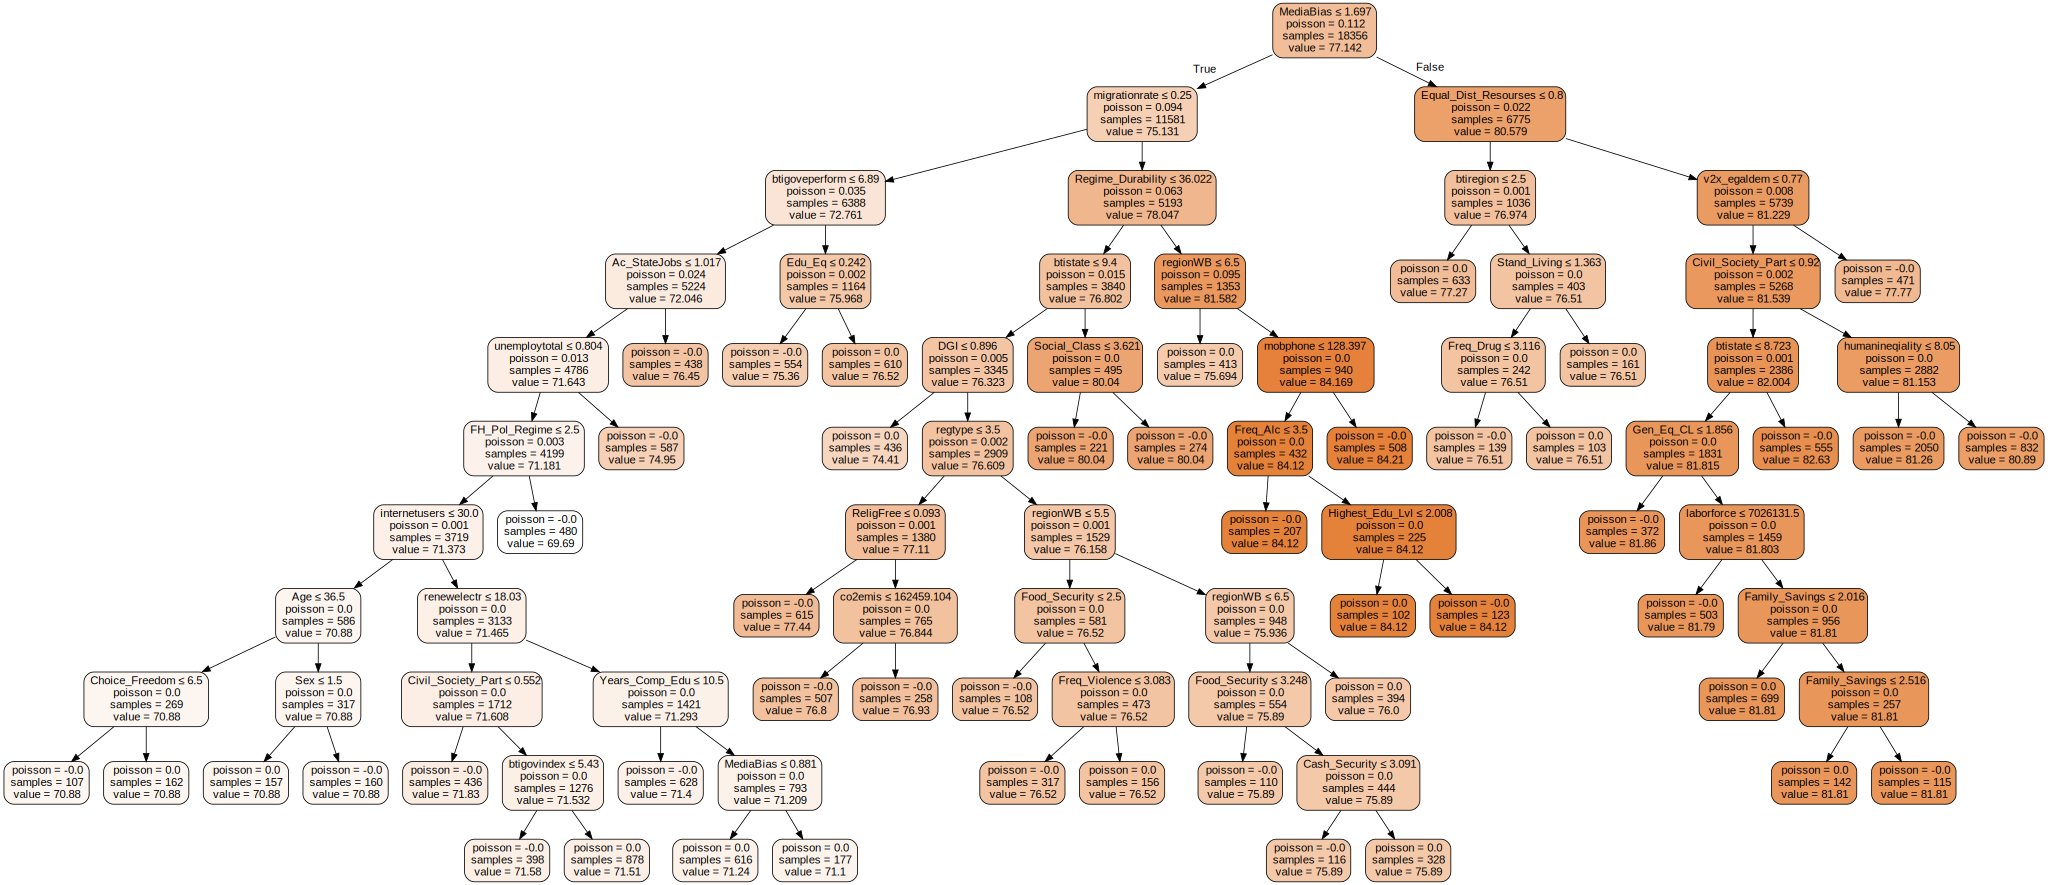

In [74]:
#plot the best_dt_rg to predict age by using feature names from X_train_reg's columns.

from sklearn import tree
age_data = tree.export_graphviz(best_dt_reg, out_file=None,
                                feature_names=X_train_reg.columns,
                                filled=True, rounded=True,
                                special_characters=True)
age_graph = graphviz.Source(age_data)
age_graph

In [75]:
#make the table of feature importance
feature_importance_df = pd.DataFrame(
    np.round(best_dt_reg.feature_importances_, 2), 
    index=X_reg.columns, 
    columns=['Importance']
)
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                   Importance
MediaBias                0.40
migrationrate            0.26
Regime_Durability        0.07
regionWB                 0.06
btigoveperform           0.05
...                       ...
Free_Aca_Exc             0.00
F_PolEmpower             0.00
F_CL                     0.00
F_PolPart                0.00
AtJ                      0.00

[114 rows x 1 columns]


### Explore our data with a Random Forest Regressor

In [76]:
# import randomforestclasssifier class
from sklearn.ensemble import RandomForestRegressor

rf_clf= RandomForestRegressor(random_state=42)
rf_clf = rf_clf.fit(X_train_reg, y_train_reg)
float("%.3f" % rf_clf.score(X_test_reg,y_test_reg))

1.0

In [77]:
# gini performs marginally better than entropy in terms of criterion.
rf_clf_1 = RandomForestRegressor(random_state=42, criterion = 'poisson')
rf_clf_1 = rf_clf_1.fit(X_train_reg, y_train_reg)
np.round(rf_clf_1.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [78]:
# max_depth set to 10, with posisson which has the best score.
rf_clf_2 = RandomForestRegressor(random_state=42, criterion = 'poisson', max_depth = 10)
rf_clf_2 = rf_clf_2.fit(X_train_reg, y_train_reg)
np.round(rf_clf_2.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [79]:
# As the minimum samples per leaf decreases, the model's performance improves and optimizes near five samples per leaf.
rf_clf_3 = RandomForestRegressor(random_state=42, min_samples_leaf = 5)
rf_clf_3 = rf_clf_3.fit(X_train_reg, y_train_reg)
np.round(rf_clf_3.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [80]:
# for max features to consider when looking for best split, three to seven have nearly similar values
rf_clf_4 = RandomForestRegressor(random_state=42, max_features = 5)
rf_clf_4 = rf_clf_4.fit(X_train_reg, y_train_reg)
np.round(rf_clf_4.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [81]:
# for minimum samples in a leaf in order to split, five has the highest score while balancing overfit concerns.
rf_clf_5 = RandomForestRegressor(random_state=42, min_samples_split = 5)
rf_clf_5 = rf_clf_5.fit(X_train_reg, y_train_reg)
np.round(rf_clf_5.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [82]:
# Around 80 trees in the forest has the maximal model performance
rf_clf_6 = RandomForestRegressor(random_state=42, n_estimators= 80)
rf_clf_6 = rf_clf_6.fit(X_train_reg, y_train_reg)
np.round(rf_clf_6.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [83]:
# let's try combining all of the highest performing number for each parameter together
rf_clf_7 = RandomForestRegressor(random_state=42, min_samples_split = 5, max_features = 5, min_samples_leaf = 5, max_depth = 35, n_estimators= 80)
rf_clf_7 = rf_clf_7.fit(X_train_reg, y_train_reg)
np.round(rf_clf_7.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [84]:
# min samples required to split at four has the highest performing score, so this is the best model.
best_rf_clf = RandomForestRegressor(random_state=42, min_samples_split = 5, max_features = 5, min_samples_leaf = 5, max_depth = 35, n_estimators= 80)
best_rf_clf = best_rf_clf.fit(X_train_reg, y_train_reg)
np.round(best_rf_clf.score(X_test_reg,y_test_reg),3)

np.float64(1.0)

In [85]:
best_rf_df = pd.DataFrame(
    np.round(best_rf_clf.feature_importances_, 2), 
    index=X_reg.columns, 
    columns=['Importance']
)

# 2. Sort and print using the EXACT same variable name
print(best_rf_df.sort_values(by='Importance', ascending=False))

                  Importance
F_CL                    0.05
ruleoflaw               0.04
AtJ                     0.04
Public_Sec_Corr         0.04
GDPpercap1              0.04
...                      ...
MediaBias               0.00
Gen_Eq_CL               0.00
Gen_Ac_StateBus         0.00
Gen_Ac_StateJobs        0.00
F_PolPart               0.00

[114 rows x 1 columns]
